# Debugging an augmentation pipeline with ReplayCompose

An augmentation pipeline has a lot of randomness inside it. It applies augmentations with some probabilities, and it samples parameters for those augmentations (such as a rotation angle or a level of changing brightness) from a random distribution.

It could be very useful for debugging purposes to see which augmentations were applied to the image and look at the parameters of those augmentations.

`ReplayCompose` tracks augmentation parameters. You can inspect those parameters or reapply them to another image.

### Import the required libraries

In [ ]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniconda/base/envs/albumentations_examples/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Define the visualization function

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis("off")
    plt.imshow(image)

### Load an image from the disk

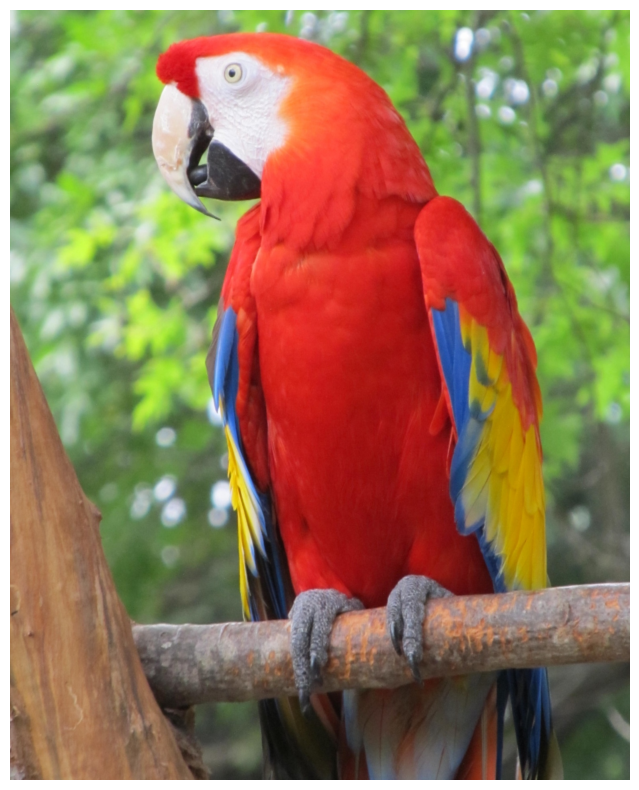

In [ ]:
image = cv2.imread("images/parrot.jpg", cv2.IMREAD_COLOR_RGB)

visualize(image)

### Declare an augmentation pipeline using `ReplayCompose`

In [ ]:
transform = A.ReplayCompose(
    [
        A.Resize(512, 512),
        A.RandomCrop(200, 200),
        A.OneOf(
            [
                A.RGBShift(),
                A.HueSaturationValue(),
            ],
        ),
    ],
)

We fix the random seed for visualization purposes, so the augmentation will always produce the same result. In a real computer vision pipeline, you shouldn't fix the random seed before applying a transform to the image because, in that case, the pipeline will always output the same image. The purpose of image augmentation is to use different transformations each time.

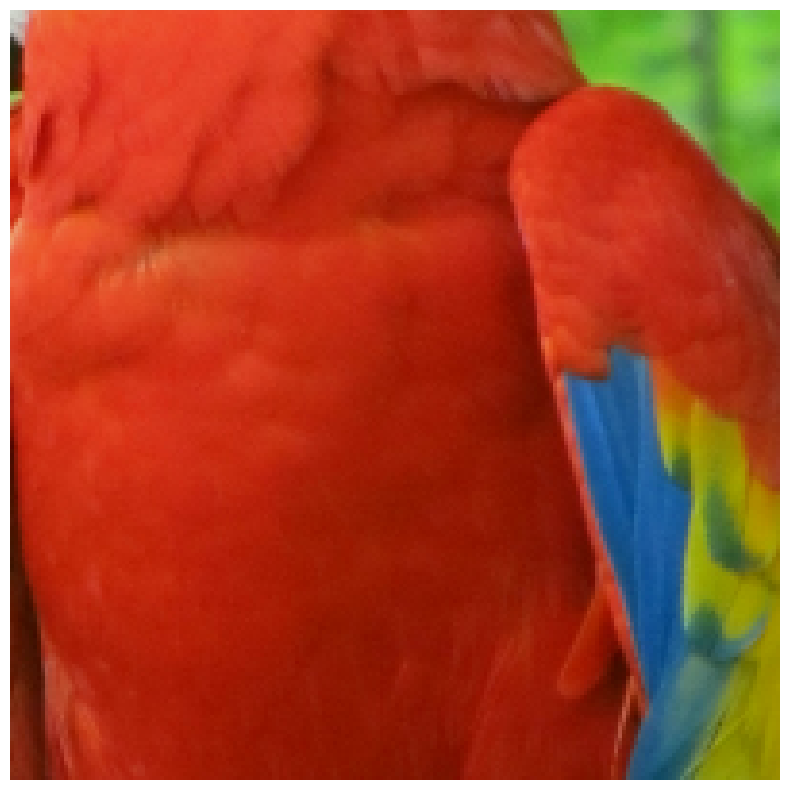

In [ ]:
data = transform(image=image)
visualize(data["image"])

`data['replay']` contains information about augmentations that ere applied to the image. If `applied` is `True`, then the augmentation was applied to the image. `params` contains information about parameters that were used to transform the image.

In [ ]:
data["replay"]

{'__class_fullname__': 'ReplayCompose',
 'params': None,
 'transforms': [{'__class_fullname__': 'Resize',
   'p': 1.0,
   'height': 512,
   'width': 512,
   'interpolation': 1,
   'mask_interpolation': 0,
   'params': {'shape': (1920, 1544, 3), 'interpolation': 1},
   'applied': True},
  {'__class_fullname__': 'RandomCrop',
   'p': 1.0,
   'height': 200,
   'width': 200,
   'pad_if_needed': False,
   'border_mode': 0,
   'fill': 0.0,
   'fill_mask': 0.0,
   'pad_position': 'center',
   'params': {'shape': (512, 512, 3),
    'fill': 0.0,
    'fill_mask': 0.0,
    'crop_coords': (204, 104, 404, 304),
    'pad_params': None},
   'applied': True},
  {'__class_fullname__': 'OneOf',
   'params': None,
   'transforms': [{'__class_fullname__': 'RGBShift',
     'p': 0.5,
     'r_shift_limit': (-20, 20),
     'g_shift_limit': (-20, 20),
     'b_shift_limit': (-20, 20),
     'params': {'shape': (200, 200, 3),
      'noise_map': array([-18.11374038,   5.91192384, -16.32571127])},
     'applied': T

### Using `ReplayCompose.replay` to apply the same augmentations to another image

To apply the same set of augmentations to a new target, you can use the `ReplayCompose.replay` function.

#### Load new images

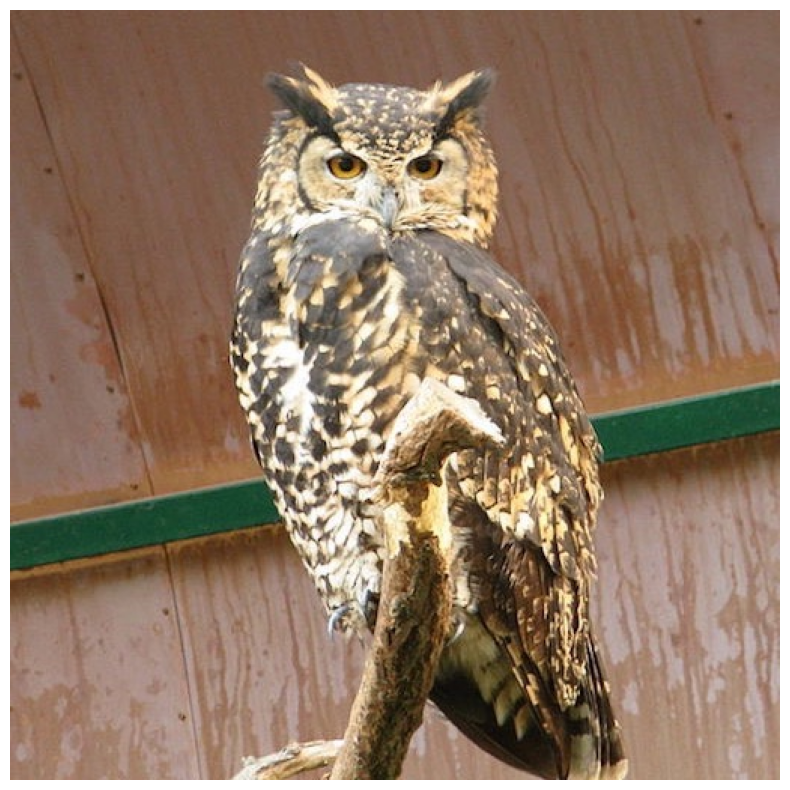

In [ ]:
image2 = cv2.imread("images/image_2.jpg", cv2.IMREAD_COLOR_RGB)
visualize(image2)

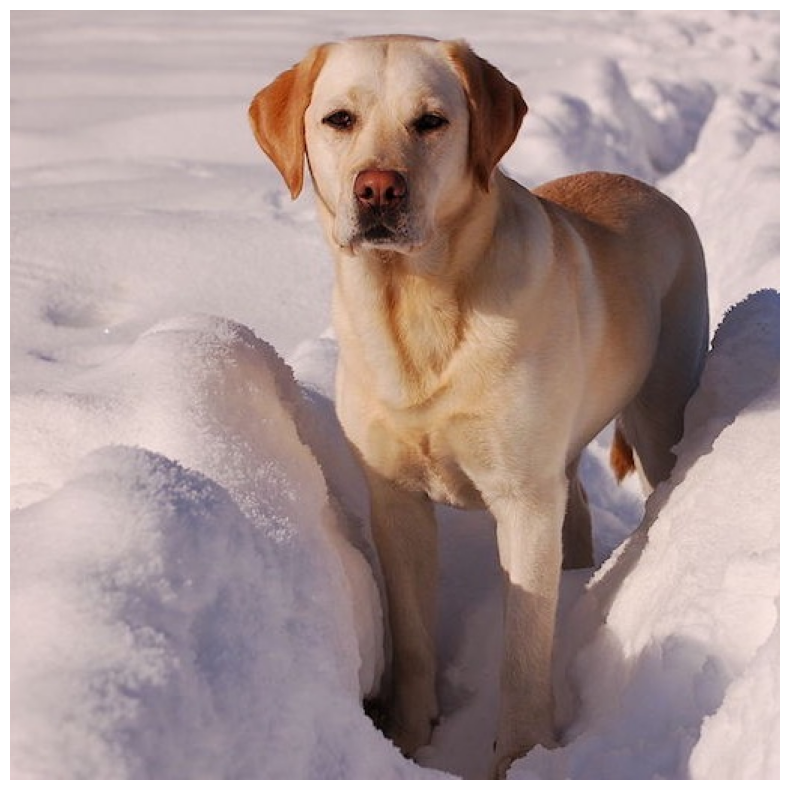

In [ ]:
image3 = cv2.imread("images/image_3.jpg", cv2.IMREAD_COLOR_RGB)

visualize(image3)

#### Apply augmentations from data['replay'] to those images

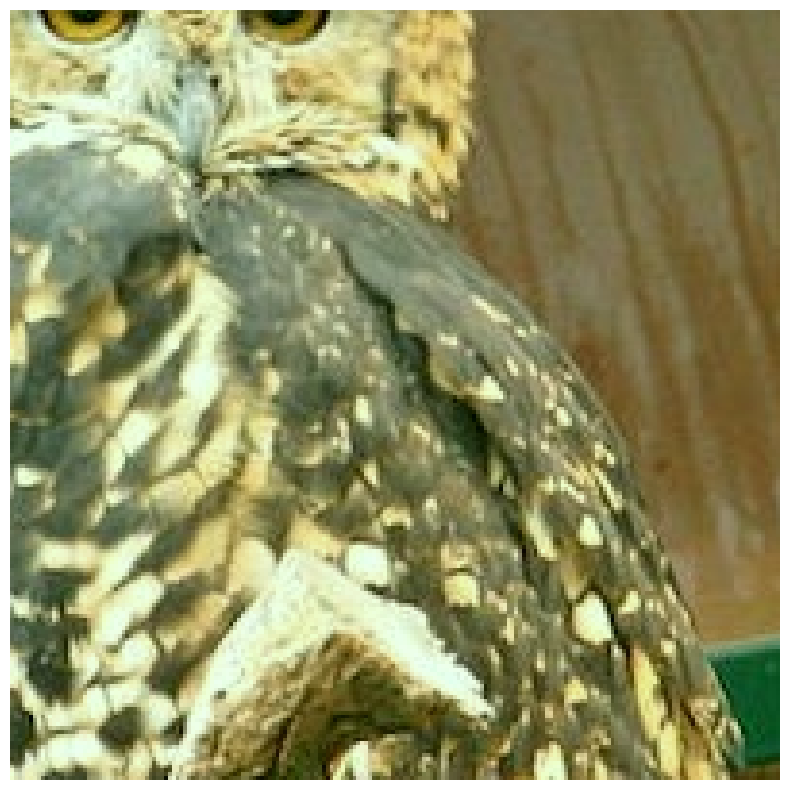

In [ ]:
image2_data = A.ReplayCompose.replay(data["replay"], image=image2)
visualize(image2_data["image"])

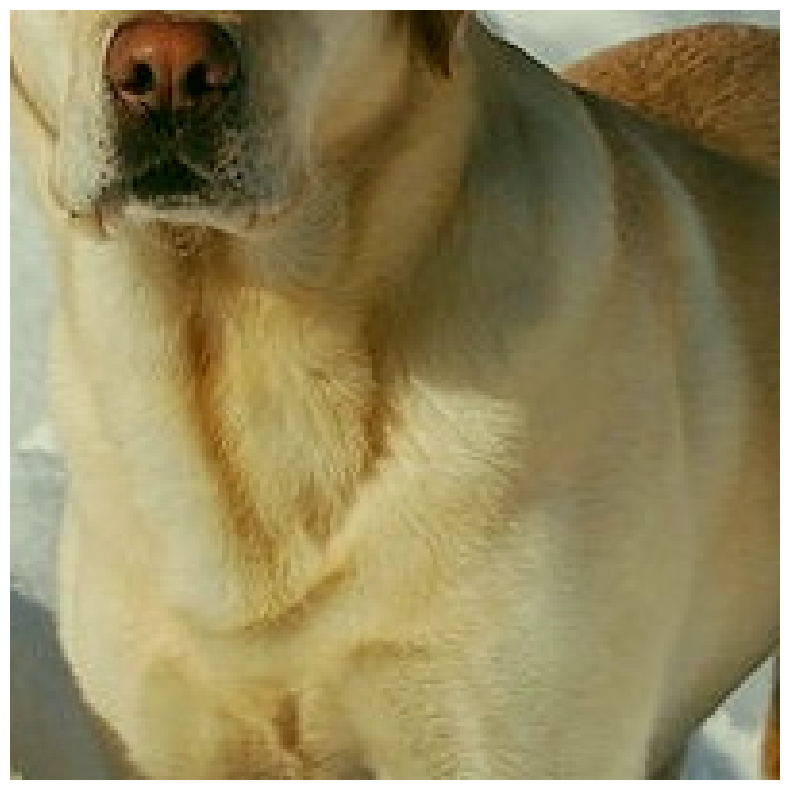

In [ ]:
image3_data = A.ReplayCompose.replay(data["replay"], image=image3)
visualize(image3_data["image"])